In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df = pd.read_excel("Pumpkin_Seeds_Dataset.xlsx")
print(df.head())


    Area  Perimeter  Major_Axis_Length  Minor_Axis_Length  Convex_Area  \
0  56276    888.242           326.1485           220.2388        56831   
1  76631   1068.146           417.1932           234.2289        77280   
2  71623   1082.987           435.8328           211.0457        72663   
3  66458    992.051           381.5638           222.5322        67118   
4  66107    998.146           383.8883           220.4545        67117   

   Equiv_Diameter  Eccentricity  Solidity  Extent  Roundness  Aspect_Ration  \
0        267.6805        0.7376    0.9902  0.7453     0.8963         1.4809   
1        312.3614        0.8275    0.9916  0.7151     0.8440         1.7811   
2        301.9822        0.8749    0.9857  0.7400     0.7674         2.0651   
3        290.8899        0.8123    0.9902  0.7396     0.8486         1.7146   
4        290.1207        0.8187    0.9850  0.6752     0.8338         1.7413   

   Compactness       Class  
0       0.8207  Çerçevelik  
1       0.7487  Çerçev

In [4]:
print(df.info())
print(df.shape)
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Area               2500 non-null   int64  
 1   Perimeter          2500 non-null   float64
 2   Major_Axis_Length  2500 non-null   float64
 3   Minor_Axis_Length  2500 non-null   float64
 4   Convex_Area        2500 non-null   int64  
 5   Equiv_Diameter     2500 non-null   float64
 6   Eccentricity       2500 non-null   float64
 7   Solidity           2500 non-null   float64
 8   Extent             2500 non-null   float64
 9   Roundness          2500 non-null   float64
 10  Aspect_Ration      2500 non-null   float64
 11  Compactness        2500 non-null   float64
 12  Class              2500 non-null   object 
dtypes: float64(10), int64(2), object(1)
memory usage: 254.0+ KB
None
(2500, 13)
Area                 0
Perimeter            0
Major_Axis_Length    0
Minor_Axis_Length    0


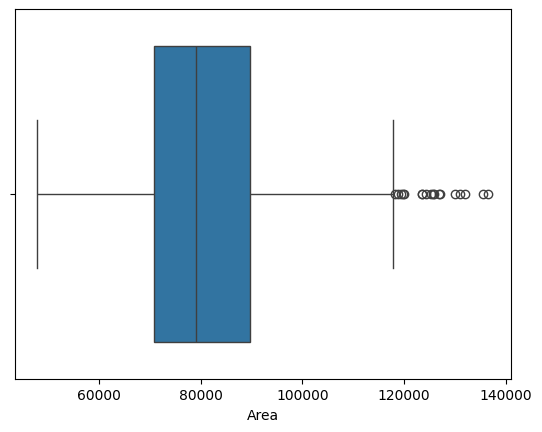

In [5]:
sns.boxplot(x=df['Area'])
plt.show()


In [6]:
Q1 = df['Area'].quantile(0.25)
Q3 = df['Area'].quantile(0.75)

IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

df = df[(df['Area'] >= lower) & (df['Area'] <= upper)]


In [7]:
from sklearn.preprocessing import MinMaxScaler

columns_to_scale = ['Area', 'Perimeter', 'Major_Axis_Length']

scaler = MinMaxScaler()

df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])


In [8]:
df = df.drop(columns=['Convex_Area','Equiv_Diameter',
                      'Eccentricity','Minor_Axis_Length'])


In [9]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Class'] = le.fit_transform(df['Class'])


In [10]:
from sklearn.model_selection import train_test_split

X = df.drop('Class', axis=1)
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [11]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()

model.fit(X_train, y_train)


,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric

In [12]:
import pickle

pickle.dump(model, open("model.pkl", "wb"))


In [13]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

import pickle


In [14]:
df = pd.read_excel("Pumpkin_Seeds_Dataset.xlsx")


In [15]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Class'] = le.fit_transform(df['Class'])


In [16]:
X = df[['Area',
        'Perimeter',
        'Major_Axis_Length',
        'Solidity',
        'Extent',
        'Roundness',
        'Aspect_Ration',
        'Compactness']]
y = df['Class']


In [17]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)


In [18]:
models = {

    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Naive Bayes": GaussianNB(),
    "SVM": SVC(),
    "Gradient Boosting": GradientBoostingClassifier()

}

results = {}


In [19]:
for name, model in models.items():

    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)

    results[name] = acc

    print("\n======================")
    print(name)
    print("Accuracy:", acc)
    print(classification_report(y_test, y_pred))



Logistic Regression
Accuracy: 0.838
              precision    recall  f1-score   support

           0       0.82      0.87      0.84       251
           1       0.86      0.80      0.83       249

    accuracy                           0.84       500
   macro avg       0.84      0.84      0.84       500
weighted avg       0.84      0.84      0.84       500


Random Forest
Accuracy: 0.864
              precision    recall  f1-score   support

           0       0.86      0.87      0.87       251
           1       0.87      0.86      0.86       249

    accuracy                           0.86       500
   macro avg       0.86      0.86      0.86       500
weighted avg       0.86      0.86      0.86       500


Decision Tree
Accuracy: 0.832
              precision    recall  f1-score   support

           0       0.84      0.82      0.83       251
           1       0.83      0.84      0.83       249

    accuracy                           0.83       500
   macro avg       0.83      

In [20]:
print("\nModel Comparison:")

for model, acc in results.items():
    print(model, ":", acc)



Model Comparison:
Logistic Regression : 0.838
Random Forest : 0.864
Decision Tree : 0.832
Naive Bayes : 0.718
SVM : 0.552
Gradient Boosting : 0.868


In [21]:
best_model_name = max(results, key=results.get)

print("\nBest Model:", best_model_name)



Best Model: Gradient Boosting


In [22]:
best_model = models[best_model_name]

pickle.dump(best_model, open("model.pkl", "wb"))

print("Best model saved as model.pkl")


Best model saved as model.pkl


In [23]:
sample = [[80000,1100,420,220,58000,260,0.82,0.99,0.74,0.89,1.48,0.82]]

prediction = best_model.predict(sample)

print("Prediction:", prediction[0])


c:\Users\UTG-Windows-User-03\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


ValueError: X has 12 features, but GradientBoostingClassifier is expecting 8 features as input.

In [23]:
if prediction[0] == 0:
    print("Your seed lies in Çerçevelik class")
else:
    print("Your seed lies in Ürgüp Sivrisi class")


Your seed lies in Çerçevelik class


In [24]:
model_names = []
accuracy_scores = []

models = [
    ("Logistic Regression", LogisticRegression(max_iter=1000)),
    ("Decision Tree Classifier", DecisionTreeClassifier()),
    ("RandomForest Classifier", RandomForestClassifier()),
    ("Multinomial Naive Bayes", GaussianNB()),
    ("Support Vector Classifier", SVC()),
    ("Gradient Boost Classifier", GradientBoostingClassifier())
]

for name, model in models:

    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)

    model_names.append(name)
    accuracy_scores.append(acc)

    print("\n====================")
    print(name)
    print("Accuracy:", acc)
    print(classification_report(y_test, y_pred))



Logistic Regression
Accuracy: 0.862
              precision    recall  f1-score   support

           0       0.84      0.90      0.87       251
           1       0.89      0.82      0.86       249

    accuracy                           0.86       500
   macro avg       0.86      0.86      0.86       500
weighted avg       0.86      0.86      0.86       500


Decision Tree Classifier
Accuracy: 0.822
              precision    recall  f1-score   support

           0       0.82      0.82      0.82       251
           1       0.82      0.82      0.82       249

    accuracy                           0.82       500
   macro avg       0.82      0.82      0.82       500
weighted avg       0.82      0.82      0.82       500


RandomForest Classifier
Accuracy: 0.862
              precision    recall  f1-score   support

           0       0.87      0.86      0.86       251
           1       0.86      0.87      0.86       249

    accuracy                           0.86       500
   macro

In [25]:
import pandas as pd

model_comparison = pd.DataFrame({
    "Model": model_names,
    "Score": accuracy_scores
})

model_comparison


,Model,Score
0,Logistic Regression,0.862
1,Decision Tree Classifier,0.822
2,RandomForest Classifier,0.862
3,Multinomial Naive Bayes,0.744
4,Support Vector Classifier,0.556
5,Gradient Boost Classifier,0.874


In [26]:
best_index = accuracy_scores.index(max(accuracy_scores))

best_model_name = model_names[best_index]

print("Best Model:", best_model_name)


Best Model: Gradient Boost Classifier


In [27]:
best_model = models[best_index][1]

import pickle

pickle.dump(best_model, open("model.pkl", "wb"))

print("Best model saved successfully")


Best model saved successfully


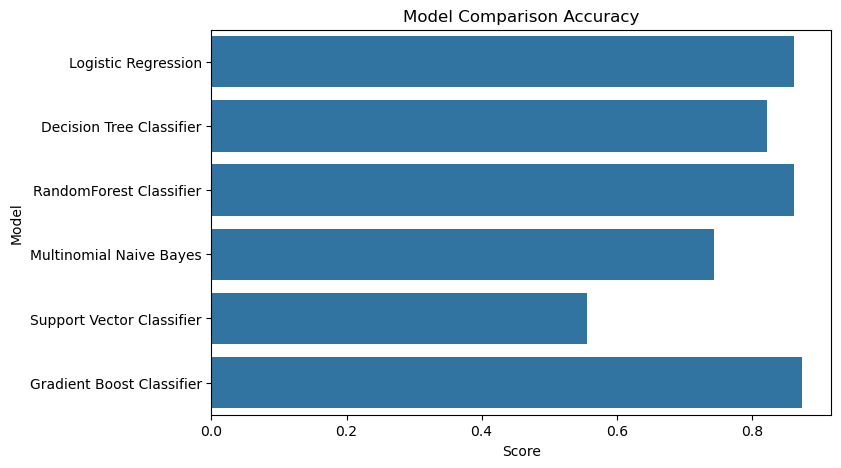

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))

sns.barplot(x="Score", y="Model", data=model_comparison)

plt.title("Model Comparison Accuracy")

plt.show()
